1. Data Import and Cleaning
1.1. Import data into a DataFrame, 
we used pandas to read the data file in CSV format.

In [67]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('compact_official_countries_only.csv')

print(data.head())


       country        date  total_cases  new_cases  new_cases_smoothed  \
0  Afghanistan  2020-01-01          NaN        NaN                 NaN   
1   Kazakhstan  2020-01-01          NaN        NaN                 NaN   
2      Finland  2020-01-01          NaN        NaN                 NaN   
3      Andorra  2020-01-01          NaN        NaN                 NaN   
4       France  2020-01-01          NaN        NaN                 NaN   

   total_cases_per_million  new_cases_per_million  \
0                      NaN                    NaN   
1                      NaN                    NaN   
2                      NaN                    NaN   
3                      NaN                    NaN   
4                      NaN                    NaN   

   new_cases_smoothed_per_million  total_deaths  new_deaths  ...  population  \
0                             NaN           NaN         NaN  ...  40578846.0   
1                             NaN           NaN         NaN  ...  20034612.0

In [68]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343740 entries, 0 to 343739
Data columns (total 61 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   country                                     343740 non-null  object 
 1   date                                        343740 non-null  object 
 2   total_cases                                 341052 non-null  float64
 3   new_cases                                   339074 non-null  float64
 4   new_cases_smoothed                          338124 non-null  float64
 5   total_cases_per_million                     341052 non-null  float64
 6   new_cases_per_million                       339074 non-null  float64
 7   new_cases_smoothed_per_million              338124 non-null  float64
 8   total_deaths                                341052 non-null  float64
 9   new_deaths                                  339606 non-null  float64
 

In [69]:
# Unubersichtliche Contries löschen
data.loc[~data['country'].str.contains("North Korea|Taiwan|Turkmenistan", na=False)]


,country,date,total_cases,new_cases,new_cases_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths,new_deaths,...,population,population_density,median_age,life_expectancy,gdp_per_capita,extreme_poverty,diabetes_prevalence,handwashing_facilities,hospital_beds_per_thousand,human_development_index
0,Afghanistan,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,40578846.0,62.215546,16.752,61.9824,1516.2733,NaN,10.9,48.214695,0.39,0.462
1,Kazakhstan,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,20034612.0,7.421052,29.348,69.3622,26093.2950,0.017695,6.6,99.009834,6.06,0.802
2,Finland,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5569299.0,18.323215,42.526,82.0381,49275.1520,0.021343,6.1,NaN,3.61,0.942
3,Andorra,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,79722.0,169.621280,42.832,80.3684,NaN,NaN,9.7,NaN,NaN,0.884
4,France,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,66277412.0,121.042030,41.567,82.4988,45904.4100,0.056357,5.3,NaN,5.91,0.910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343734,Armenia,2024-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2880883.0,101.190130,35.815,72.0431,16057.0070,0.781078,5.6,94.423660,4.20,0.786
343735,Singapore,2024-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5649886.0,7868.922000,34.878,82.7545,108036.1100,NaN,11.6,NaN,2.49,0.949
343737,Egypt,2024-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,112618251.0,113.133000,23.813,70.2207,12780.7600,1.467015,20.9,89.830930,1.43,0.728
343738,Maldives,2024-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,524116.0,1747.053300,30.339,79.9182,21271.3180,0.000000,9.2,95.839096,NaN,0.762


In [70]:
# prüfen ob NaNs vorhanden sind
print(data.isnull().sum())

country                            0
date                               0
total_cases                     2688
new_cases                       4666
new_cases_smoothed              5616
                               ...  
extreme_poverty                65225
diabetes_prevalence             4916
handwashing_facilities        153342
hospital_beds_per_thousand     80669
human_development_index         8439
Length: 61, dtype: int64


1.2. Bereinigen fehlender oder inkonsistenter Daten Identifizieren und behandeln Sie fehlende Werte, entfernen Sie Duplikate und behandeln Sie gegebenenfalls Ausreißer.

In [71]:
# Löschen von Spalten, in denen weniger als 10% der Werte ausgefüllt sind
threshold = len(data) * 0.1
columns_to_drop = [col for col in data.columns if data[col].count() < threshold]

# Spalten mit vielen Lücken löschen
data = data.drop(columns=columns_to_drop)

# Überprüfen der verbleibenden Spalten
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343740 entries, 0 to 343739
Data columns (total 53 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   country                                     343740 non-null  object 
 1   date                                        343740 non-null  object 
 2   total_cases                                 341052 non-null  float64
 3   new_cases                                   339074 non-null  float64
 4   new_cases_smoothed                          338124 non-null  float64
 5   total_cases_per_million                     341052 non-null  float64
 6   new_cases_per_million                       339074 non-null  float64
 7   new_cases_smoothed_per_million              338124 non-null  float64
 8   total_deaths                                341052 non-null  float64
 9   new_deaths                                  339606 non-null  float64
 

1.3. Konvertieren Sie Datumsangaben in das entsprechendes Format 
     und die Datumsspalte im Datums-/Uhrzeitformat vorliegen

In [72]:
# replace to NaN
data[['new_cases', 'new_deaths']] = data[['new_cases', 'new_deaths']].replace(0, np.nan)

# delete NaN
data = data.dropna(subset=['new_cases', 'new_deaths'])

In [73]:
# Convert the 'date' column to datetime
data['date'] = pd.to_datetime(data['date'])

# extract the year
data['year'] = data['date'].dt.year

2. Erste Datenanalyse
2.1. Grundlegende Statistiken berechne Pandas-Methoden, um Mittelwert, Median und Standardabweichung zu berechnen.

In [74]:
# Basic statistics
print("Mean of cases:", data['total_cases'].mean())
print("Median of cases:", data['total_cases'].median())
print("Standard deviation of cases:", data['total_cases'].std())


Mean of cases: 3088978.8721304443
Median of cases: 333484.0
Standard deviation of cases: 9806380.741604432


In [75]:
# Summary statistics for new cases and deaths
print("Statistics for new cases:")
print(data['new_cases'].describe())
print("\nStatistics for new deaths:")
print(data['new_deaths'].describe())


Statistics for new cases:
count    2.330500e+04
mean     3.272146e+04
std      3.493309e+05
min      1.000000e+00
25%      3.830000e+02
50%      2.135000e+03
75%      1.087900e+04
max      4.047548e+07
Name: new_cases, dtype: float64

Statistics for new deaths:
count    23305.000000
mean       298.518816
std       1253.577325
min          1.000000
25%          4.000000
50%         23.000000
75%        116.000000
max      47687.000000
Name: new_deaths, dtype: float64


In [ ]:
#  die Daten nach 'Kontinent' gruppieren und berechnen die Summe der Gesamtfälle und der Gesamtsterblichkeit
continent_data = data.groupby('continent').agg({
    'total_cases': 'sum',
    'total_deaths': 'sum',
    'population': 'mean'  
}).reset_index()

print(continent_data)


       continent   total_cases  total_deaths    population
0         Africa  8.750340e+08    20926529.0  3.275750e+07
1           Asia  2.648195e+10   204517037.0  1.609451e+08
2         Europe  2.566483e+10   289690226.0  1.916578e+07
3  North America  1.071719e+10   180960334.0  3.970127e+07
4        Oceania  1.331752e+09     2464697.0  1.244124e+07
5  South America  6.917900e+09   163015714.0  3.699556e+07


3. Visualisation

3.1. Verteilungen untersuchen Visualisiere die Verteilung von Fällen und Todesfällen.

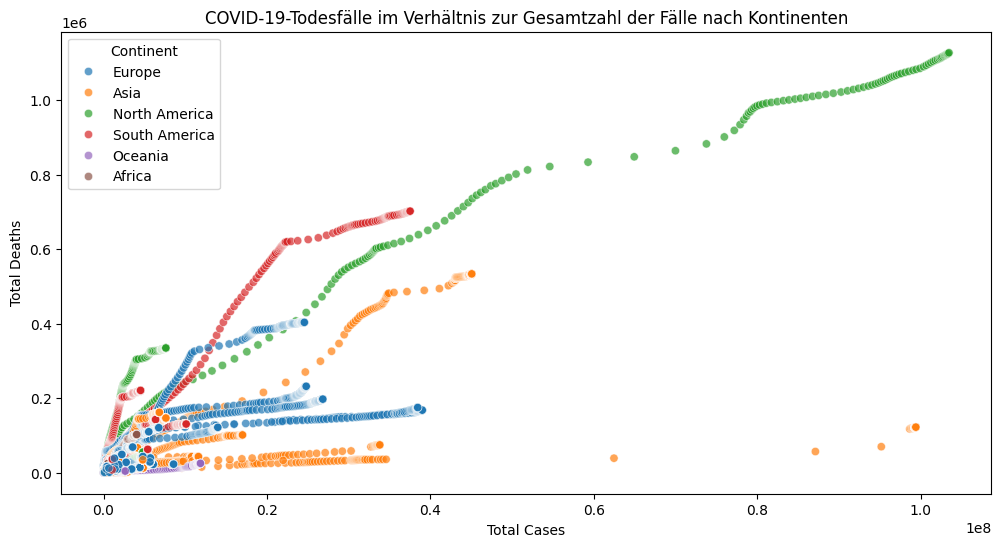

In [77]:
# Scatterplot für Todesfälle im Verhältnis zu den Gesamtfällen
plt.figure(figsize=(12, 6))
sns.scatterplot(x='total_cases', y='total_deaths', data=data, hue='continent', alpha=0.7)
plt.title('COVID-19-Todesfälle im Verhältnis zur Gesamtzahl der Fälle nach Kontinenten')
plt.xlabel('Total Cases')
plt.ylabel('Total Deaths')
plt.legend(title='Continent')
plt.show()

Die Verteilung zeigt, dass Nordamerika und Südamerika im Verhältnis zur Gesamtzahl der Fälle höhere Todesraten haben, während andere Kontinente wie Asien eine flachere Kurve aufweisen.

3.2. Der Trend neuer COVID-19-Fälle im Zeitverlauf für jeden Kontinent

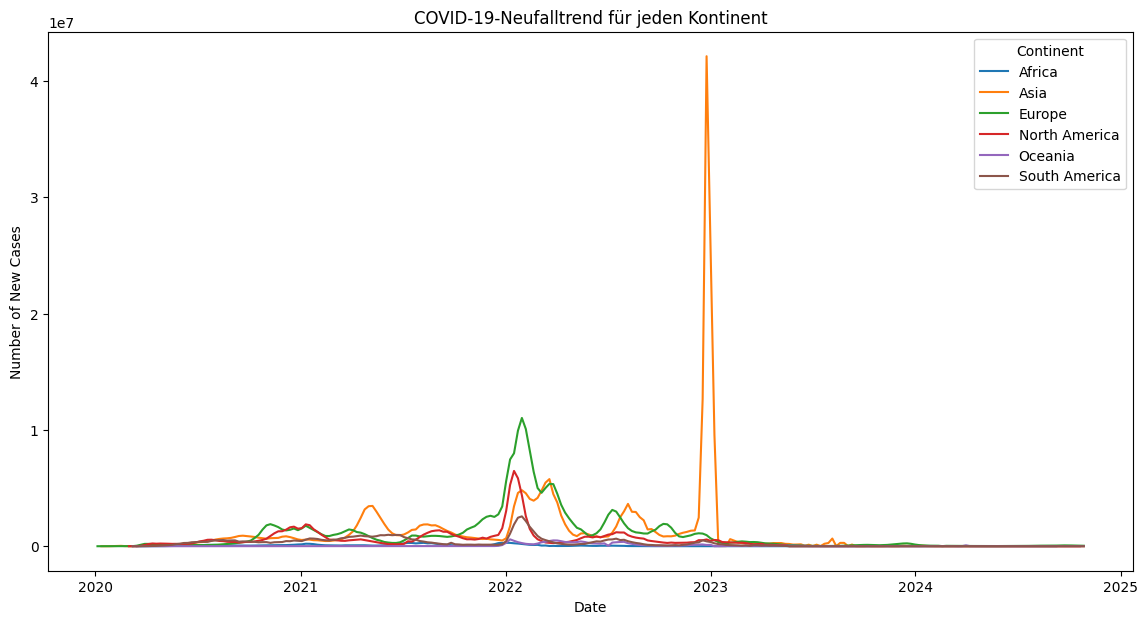

In [78]:
# Gruppieren Sie die Daten nach Kontinent und Datum und summieren Sie die neuen Fälle
continent_data = data.groupby(['continent', 'date'])['new_cases'].sum().reset_index()

plt.figure(figsize=(14, 7))

# Durchlaufen jeden Kontinent
continents = continent_data['continent'].unique()
for continent in continents:
    continent_subset = continent_data[continent_data['continent'] == continent]
    plt.plot(continent_subset['date'], continent_subset['new_cases'], label=continent)

plt.xlabel('Date')
plt.ylabel('Number of New Cases')
plt.title('COVID-19-Neufalltrend für jeden Kontinent')
plt.legend(title='Continent')
plt.show()


Das Diagramm zeigt die globale Ausbreitung von COVID-19 mit starken Wellen, insbesondere in Asien und Europa. Der singuläre Peak in Asien im Jahr 2023 ist auffällig und hebt sich von anderen Mustern ab. Solche Anomalien könnten auf spezielle Ereignisse, politische Maßnahmen oder die Entstehung neuer Virusvarianten hinweisen.

3.3. Heatmap
Anzahl der neuen COVID-19-Fälle für verschiedene Kontinente über 4 Jahre 

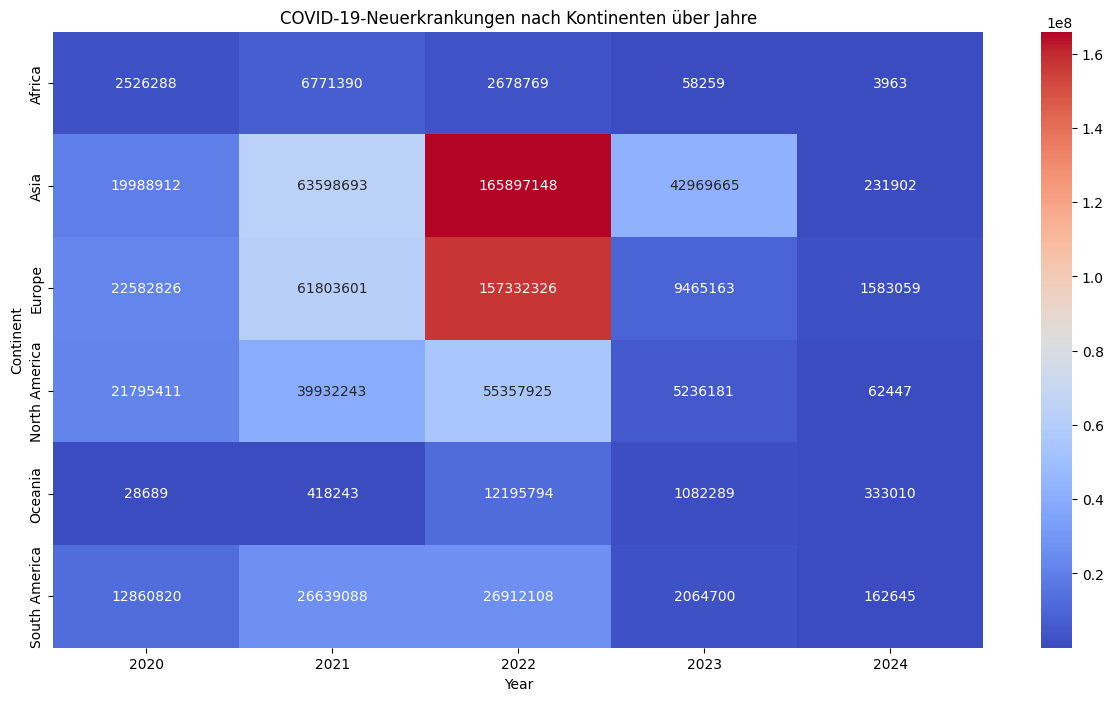

In [79]:
# Create a new column for the year
data['year'] = data['date'].dt.year

heatmap_data = data.pivot_table(values='new_cases', index='continent', columns='year', aggfunc='sum')

plt.figure(figsize=(15, 8))
sns.heatmap(heatmap_data, cmap='coolwarm', cbar=True, annot=True, fmt=".0f")
plt.title('COVID-19-Neuerkrankungen nach Kontinenten über Jahre')
plt.xlabel('Year')
plt.ylabel('Continent')
plt.show()


Die Heatmap legt nahe, dass die COVID-19-Pandemie ihren Höhepunkt im Jahr 2022 in Asien und Europa erreicht hat, während die anderen Jahre und Kontinente insgesamt geringere Neuerkrankungsraten verzeichneten. Im Jahr 2023 und darüber hinaus scheinen die Fallzahlen in vielen Regionen zurückgegangen zu sein, was auf eine mögliche Verbesserung der Pandemiesituation oder erfolgreichere Kontrollmaßnahmen hinweisen könnte

3.4. Bar plot zur Visualisierung der Gesamtzahl der Todesfälle durch COVID-19 nach Jahr und Kontinent

/var/folders/0h/ypbwc3rx17j8g6cw7k7fj6700000gn/T/ipykernel_21019/2051808164.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='year', y='total_deaths', data=data, hue='continent', ci=None, estimator=sum)


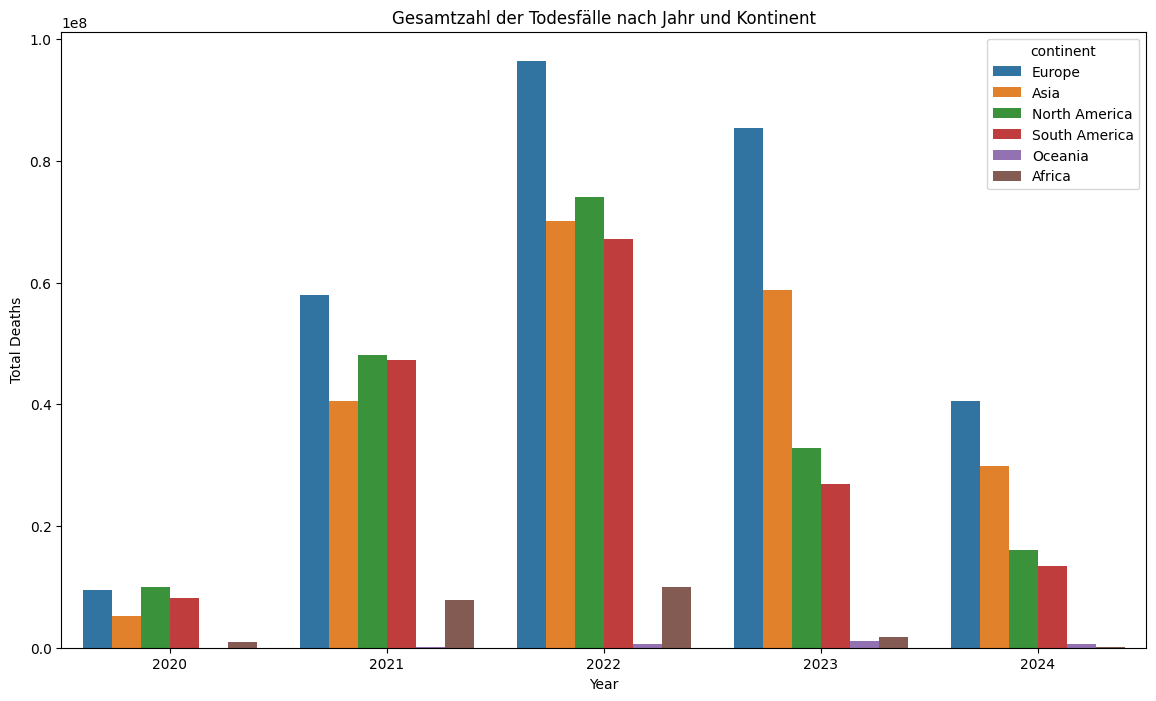

In [80]:
plt.figure(figsize=(14, 8))
sns.barplot(x='year', y='total_deaths', data=data, hue='continent', ci=None, estimator=sum)

plt.title('Gesamtzahl der Todesfälle nach Jahr und Kontinent')
plt.xlabel('Year')
plt.ylabel('Total Deaths')

plt.show()


Das Diagramm stellt die Gesamtzahl der Todesfälle pro Jahr und Kontinent dar. Es ist deutlich erkennbar, dass die Anzahl der Todesfälle über die Jahre hinweg variiert und sich je nach Kontinent unterscheidet

Der saisonale Einfluss auf die Geschwindigkeit der Virusausbreitung wurde analysiert, indem eine neue Spalte für die Jahreszeit (z. B. Frühling, Sommer, Herbst, Winter) erstellt wurde, basierend auf dem Datum. Diese Analyse wird in einem Barplot veranschaulicht, der die Infektionstrends über die verschiedenen Jahreszeiten hinweg darstellt.

3.5. Pie chart to visualize the distribution of total COVID-19 cases by continent

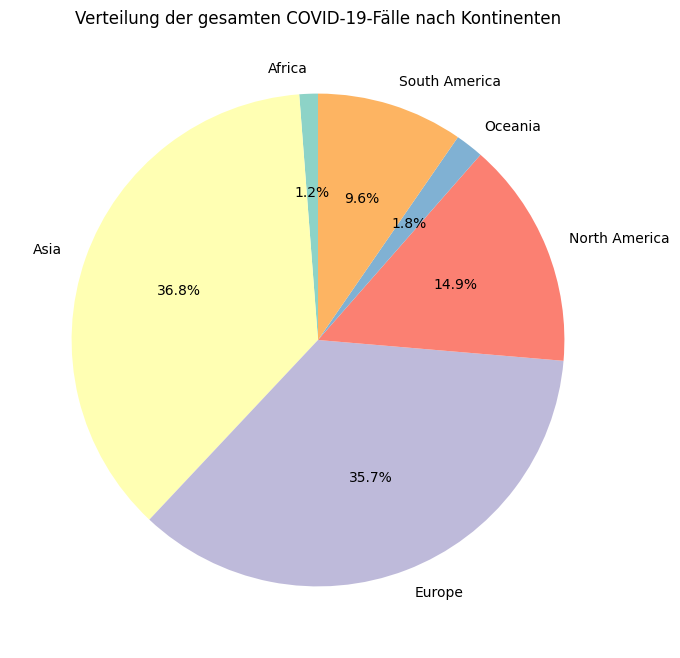

In [81]:
# Group by 'continent' and sum the total cases
continent_cases = data.groupby('continent')['total_cases'].sum().dropna()

plt.figure(figsize=(8, 8))
plt.pie(continent_cases, labels=continent_cases.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set3", len(continent_cases)))

plt.title('Verteilung der gesamten COVID-19-Fälle nach Kontinenten')
plt.show()


Asien, Europa und Nordamerika verzeichnen gemeinsam über 86 % aller Fälle. Mögliche Einflussfaktoren sind die Bevölkerungsdichte und -größe, unterschiedliche Test- und Meldekapazitäten sowie variierende Gesundheitssysteme und Präventionsmaßnahmen auf den Kontinenten.

2. Länder / Kontinente mit höheren Impfraten haben niedrigere Sterblichkeitsraten?

In [82]:
data['vaccinated_cases'] = (data['people_vaccinated'] / 100) * data['total_cases'] # Anzahl der Fälle unter geimpften Personen, indem die Gesamtzahl der Fälle mit der Impfrate multipliziert wird (personen_geimpft / 100).
data['unvaccinated_cases'] = data['total_cases'] - data['vaccinated_cases']

data['vaccinated_deaths'] = (data['vaccinated_cases'] / data['total_cases']) * data['total_deaths'] #die Todesfallrate unter Geimpften 
data['unvaccinated_deaths'] = (data['unvaccinated_cases'] / data['total_cases']) * data['total_deaths']

total_vaccinated_deaths = data['vaccinated_deaths'].sum()
total_unvaccinated_deaths = data['unvaccinated_deaths'].sum()


/var/folders/0h/ypbwc3rx17j8g6cw7k7fj6700000gn/T/ipykernel_21019/4192560304.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=deaths_data, y=deaths_values, palette='viridis')


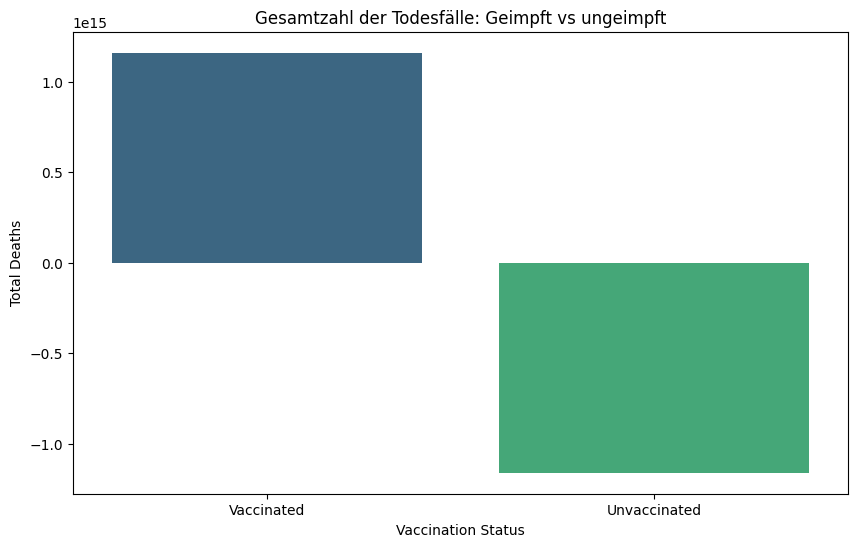

In [83]:
total_vaccinated_deaths = data['vaccinated_deaths'].sum()
total_unvaccinated_deaths = data['unvaccinated_deaths'].sum()

deaths_data = ['Vaccinated', 'Unvaccinated']
deaths_values = [total_vaccinated_deaths, total_unvaccinated_deaths]

plt.figure(figsize=(10, 6))
sns.barplot(x=deaths_data, y=deaths_values, palette='viridis')
plt.title('Gesamtzahl der Todesfälle: Geimpft vs ungeimpft')
plt.xlabel('Vaccination Status')
plt.ylabel('Total Deaths')
plt.show()

Erstellenung eine Barplot, das die Beziehung zwischen Impfraten und Sterblichkeitsraten zeigt.

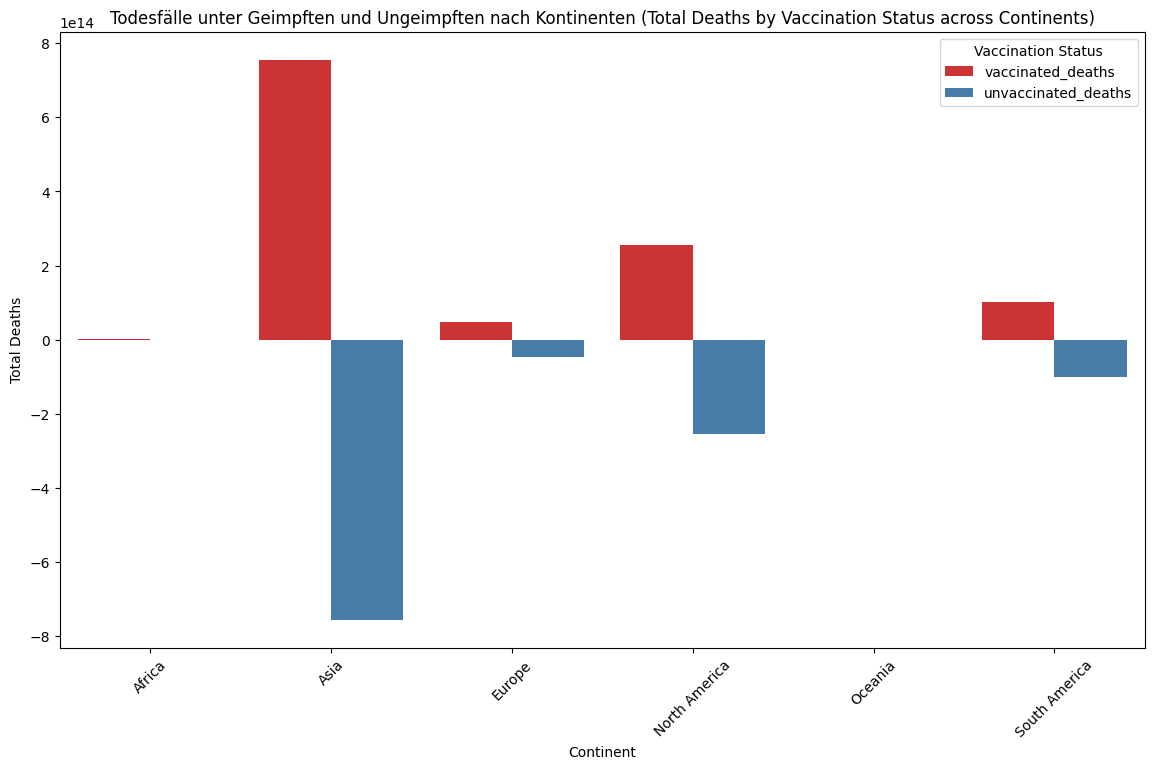

In [84]:
continent_deaths = data.groupby('continent')[['vaccinated_deaths', 'unvaccinated_deaths']].sum().reset_index()
continent_deaths_melted = continent_deaths.melt(id_vars='continent', value_vars=['vaccinated_deaths', 'unvaccinated_deaths'],
                                                var_name='Vaccination Status', value_name='Total Deaths')

# Create a bar chart
plt.figure(figsize=(14, 8))
sns.barplot(x='continent', y='Total Deaths', hue='Vaccination Status', data=continent_deaths_melted, palette='Set1')
plt.title('Todesfälle unter Geimpften und Ungeimpften nach Kontinenten (Total Deaths by Vaccination Status across Continents)')
plt.xlabel('Continent')
plt.ylabel('Total Deaths')
plt.xticks(rotation=45)
plt.show()

Sowie auch  auf verschiedenen Kontinenten. In den meisten Kontinenten gibt es deutlich weniger Todesfälle unter Geimpften im Vergleich zu Ungeimpften. Das deutet darauf hin, dass Impfungen eine Schutzwirkung gegen schwere Verläufe und Todesfälle haben. Auffällig ist, dass Asien extrem hohe Todeszahlen unter Ungeimpften im Vergleich zu Geimpften aufweist. Europa und Nordamerika: Hier sind die Unterschiede zwischen geimpften und ungeimpften Todesfällen weniger extrem, was auf eine bessere Impfstoffverteilung oder eine generell höhere Impfrate hinweisen könnte. Afrika und Ozeanien: Diese Kontinente zeigen insgesamt geringere Todeszahlen. Das kann auf niedrigere Fallzahlen oder eine andere Bevölkerungsstruktur zurückzuführen sein. Unterschiede zwischen den Kontinenten könnten auf Faktoren wie Impfstoffverfügbarkeit, demografische Unterschiede, Zugang zum Gesundheitssystem oder Variationen im Krankheitsverlauf hinweisen.

3. Saisonaler Einfluss auf die Geschwindigkeit der Virusausbreitung

Erstellung einer Barplot, um Infektionstrends über verschiedene Jahreszeiten hinweg anzuzeigen.

/var/folders/0h/ypbwc3rx17j8g6cw7k7fj6700000gn/T/ipykernel_21019/4249351729.py:16: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='season', y='new_cases', data=data, hue='continent', estimator=sum, ci=None)


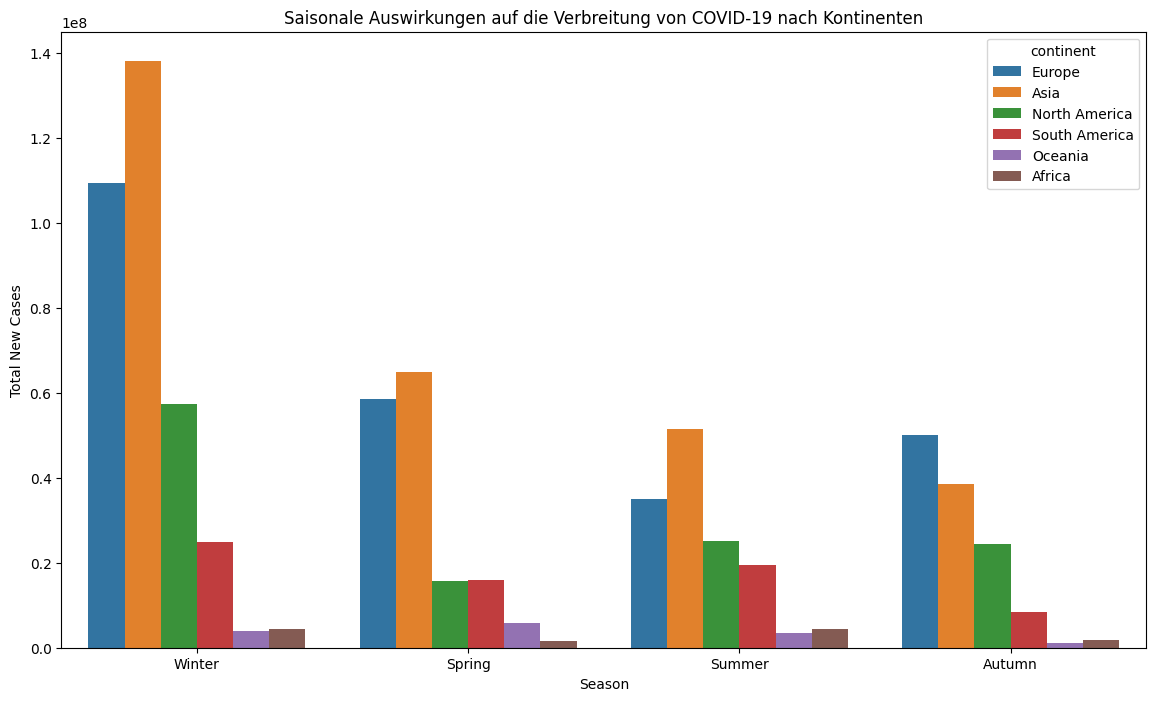

In [85]:
# Function to determine season based on date
def get_season(date):
    month = date.month
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'

data['season'] = data['date'].apply(get_season)

plt.figure(figsize=(14, 8))
sns.barplot(x='season', y='new_cases', data=data, hue='continent', estimator=sum, ci=None)
plt.title('Saisonale Auswirkungen auf die Verbreitung von COVID-19 nach Kontinenten')
plt.xlabel('Season')
plt.ylabel('Total New Cases')

plt.show()


Der saisonale Einfluss auf die Geschwindigkeit der Virusausbreitung wurde analysiert, indem eine neue Spalte für die Jahreszeit (z. B. Frühling, Sommer, Herbst, Winter) erstellt wurde, basierend auf dem Datum. Diese Analyse wird in einem Barplot veranschaulicht, der die Infektionstrends über die verschiedenen Jahreszeiten hinweg darstellt.

Korrelation zwischen Infektionsraten und Todesfällen

Korrelationskoeffizient zwischen Infektionsraten und Todesfällen: 0.74


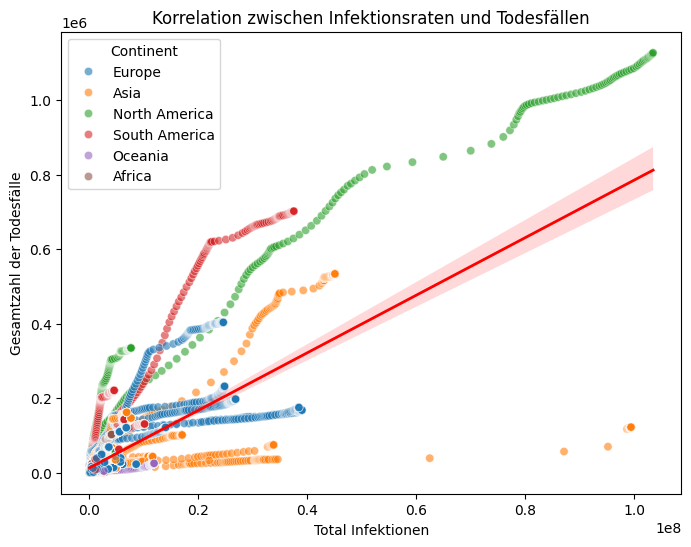

In [97]:
correlation = data['total_cases'].corr(data['total_deaths'])

print(f'Korrelationskoeffizient zwischen Infektionsraten und Todesfällen: {correlation:.2f}')

plt.figure(figsize=(8, 6))
sns.scatterplot(x='total_cases', y='total_deaths', data=data, hue='continent', alpha=0.6)
sns.regplot(x='total_cases', y='total_deaths', data=data, scatter=False, color='red', line_kws={'linewidth': 2})
plt.title('Korrelation zwischen Infektionsraten und Todesfällen')
plt.xlabel('Total Infektionen')
plt.ylabel('Gesamtzahl der Todesfälle')
plt.legend(title='Continent')
plt.show()


Die Korrelation zwischen Infektionsraten und Todesfällen kann ein Hinweis auf die Schwere der Pandemie und deren Auswirkungen auf die Gesundheitssysteme sein. Es ist jedoch wichtig, auch weitere kontextuelle und gesundheitliche Faktoren zu berücksichtigen, um die Ursachen der Korrelation vollständig zu verstehen.

/var/folders/0h/ypbwc3rx17j8g6cw7k7fj6700000gn/T/ipykernel_21019/1325514108.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='continent', y='people_vaccinated', data=continent_vaccination, palette='Set2')


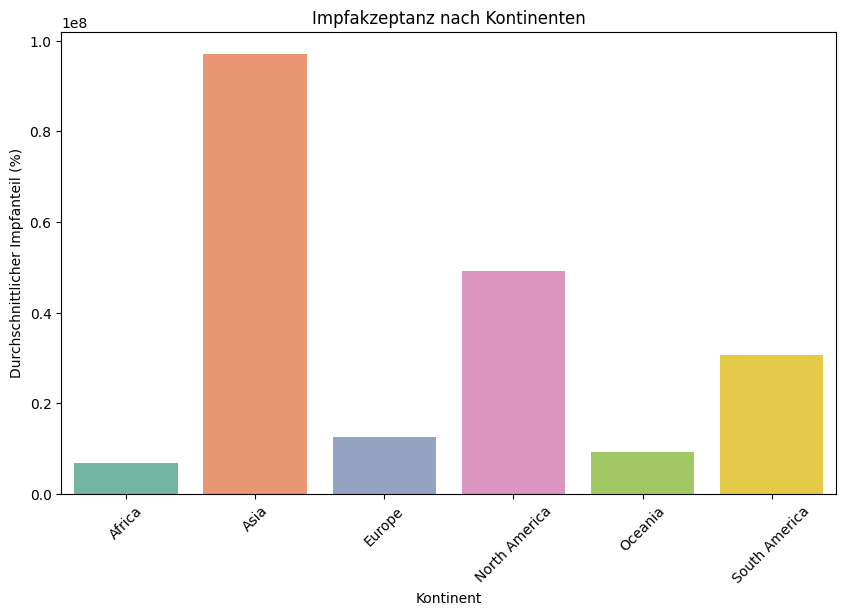

In [87]:
continent_vaccination = data.groupby('continent')['people_vaccinated'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='continent', y='people_vaccinated', data=continent_vaccination, palette='Set2')
plt.title('Impfakzeptanz nach Kontinenten')
plt.xlabel('Kontinent')
plt.ylabel('Durchschnittlicher Impfanteil (%)')
plt.xticks(rotation=45)
plt.show()

Das Diagramm stellt die durchschnittliche Impfbereitschaft in verschiedenen Kontinenten dar. 

Die Höhe der Balken repräsentiert den Anteil der Bevölkerung, der bereit ist, sich impfen zu lassen

Boxenplots zur Verteilung der Infektions- und Todeszahlen pro Region.

/var/folders/0h/ypbwc3rx17j8g6cw7k7fj6700000gn/T/ipykernel_21019/122680753.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x='continent', y='total_cases', data=data, palette='Set2')
/var/folders/0h/ypbwc3rx17j8g6cw7k7fj6700000gn/T/ipykernel_21019/122680753.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x='continent', y='total_deaths', data=data, palette='Set2')


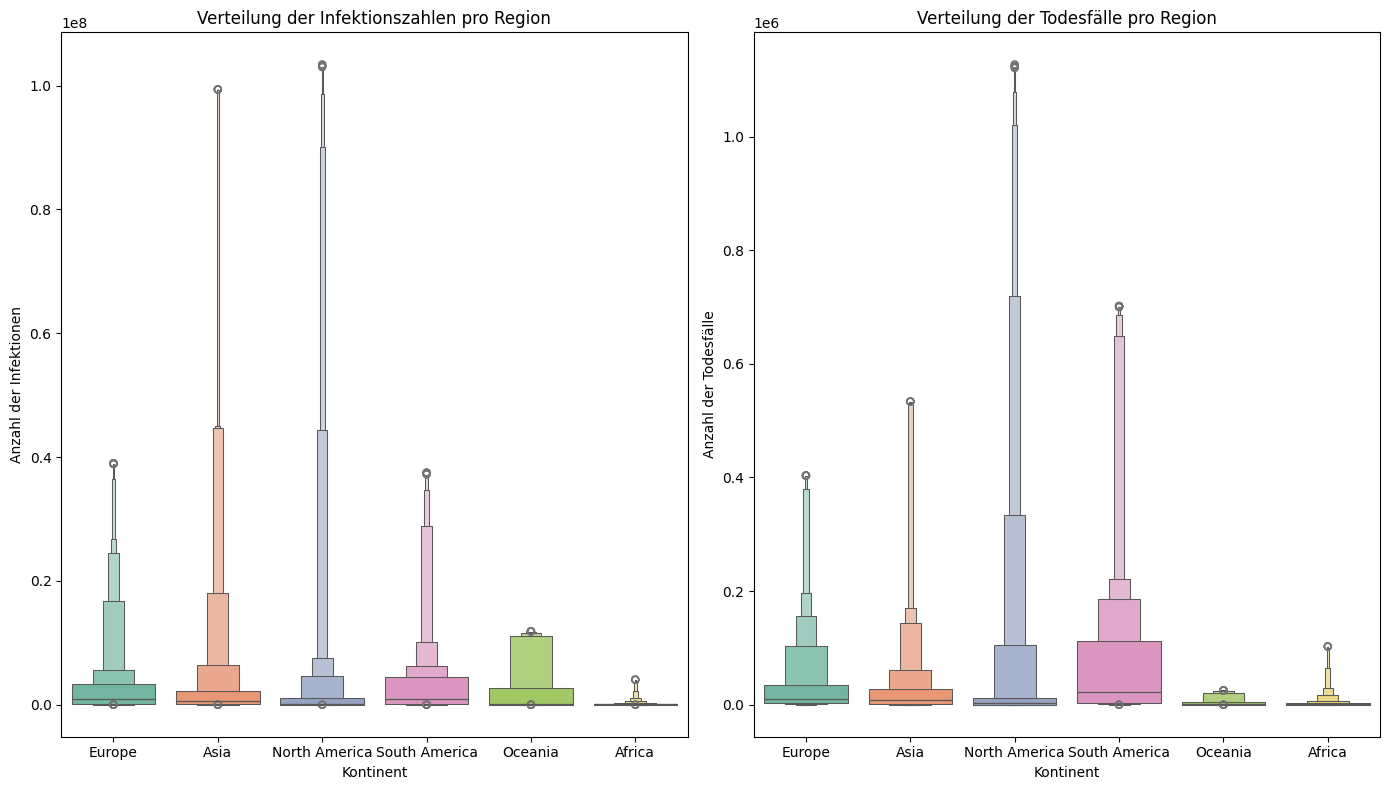

In [96]:
plt.figure(figsize=(14, 8))

# für total_cases
plt.subplot(1, 2, 1) 
sns.boxenplot(x='continent', y='total_cases', data=data, palette='Set2')
plt.title('Verteilung der Infektionszahlen pro Region')
plt.xlabel('Kontinent')
plt.ylabel('Anzahl der Infektionen')

# für total_deaths
plt.subplot(1, 2, 2) 
sns.boxenplot(x='continent', y='total_deaths', data=data, palette='Set2')
plt.title('Verteilung der Todesfälle pro Region')
plt.xlabel('Kontinent')
plt.ylabel('Anzahl der Todesfälle')

plt.tight_layout()
plt.show()


Regionen mit hohen Infektionszahlen haben in der Regel auch höhere Todeszahlen (z. B. Nordamerika, Europa und Asien). Trotz hoher Infektionszahlen zeigen einige Regionen (z. B. Asien) eine geringere Medianzahl der Todesfälle im Vergleich zu Nordamerika und Europa. Dies könnte auf unterschiedliche Gesundheitsmaßnahmen, medizinische Versorgung, demografische Unterschiede oder Regelnbefolgung in der Gesellschaft hinweisen.

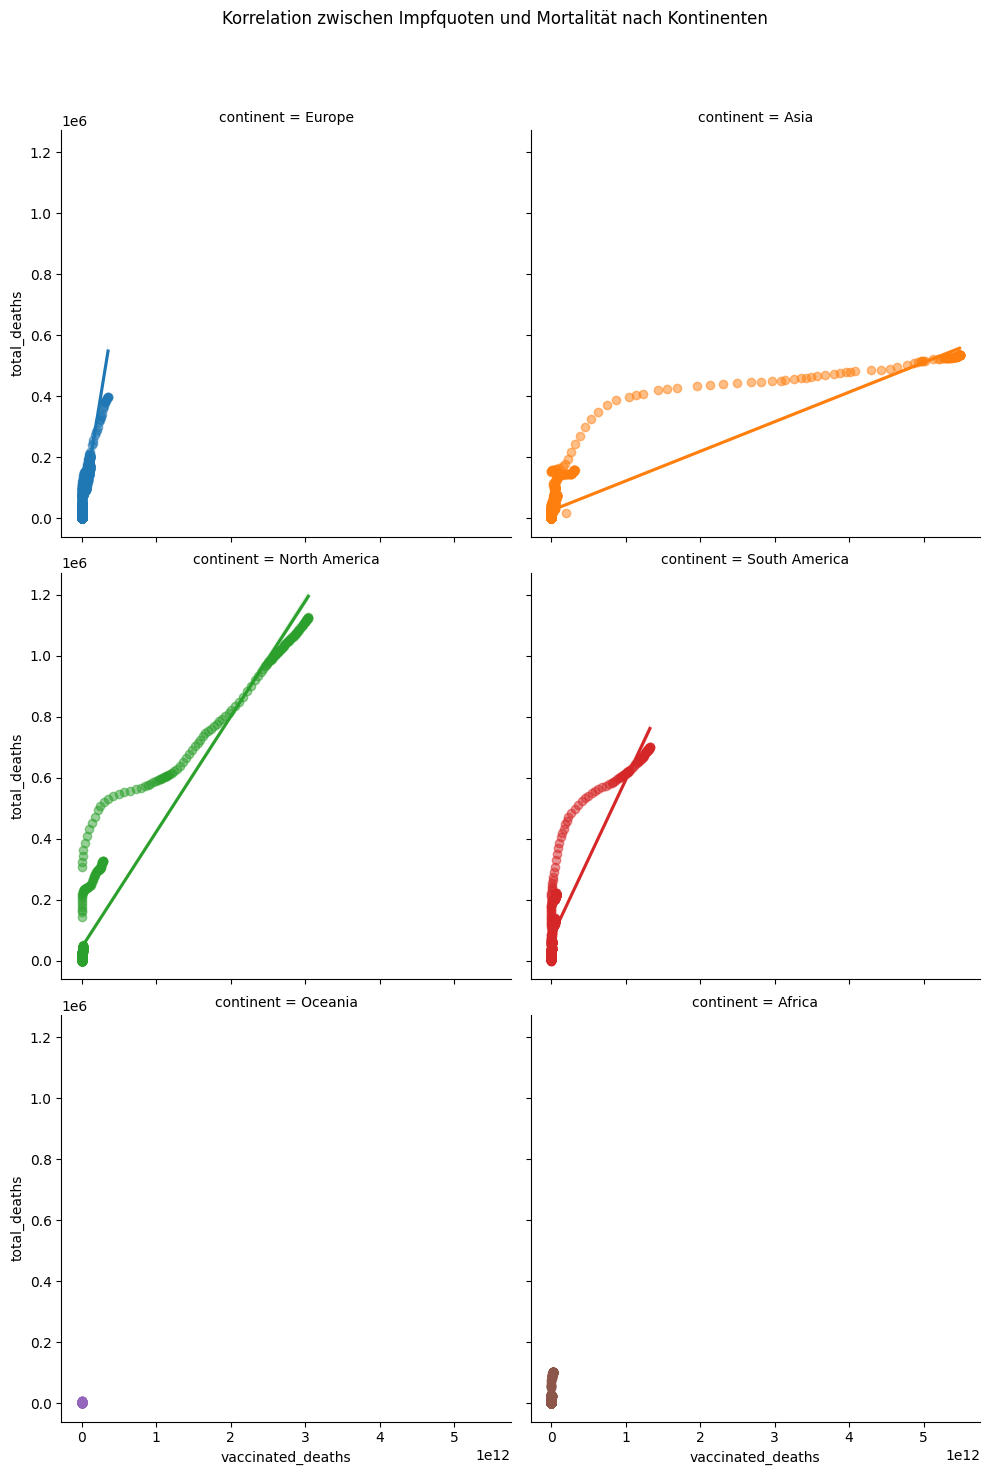

In [89]:
# Scatterplot  'total_deaths' und 'vaccinated_deaths'
sns.lmplot(y='total_deaths', x='vaccinated_deaths', data=data, hue='continent', col='continent',
           scatter_kws={'alpha': 0.5}, height=5, aspect=1, col_wrap=2)

plt.subplots_adjust(top=0.9)
plt.suptitle('Korrelation zwischen Impfquoten und Mortalität nach Kontinenten')
plt.show()


Eine hohe Korrelation würde einen engen Zusammenhang zwischen zwei Variablen andeuten. 

Beispielsweise könnte eine positive Korrelation zwischen Infektions- und Todesraten auf eine schwache Gesundheitssystemleistung hindeuten.


3. Verbindung zwischen Impfquote und Infektionszahlen


Gibt es eine Verbindung zwischen Impfquote und Infektionszahlen? (Impfstatus und Infektionsgeschehen analysieren)
Um die Verbindung zwischen Impfstatus und Infektionsgeschehen zu untersuchen:

Vergleiche people_vaccinated mit new_cases.
Scatterplots und Korrelationen helfen zu visualisieren, ob eine höhere Impfquote mit niedrigeren Infektionszahlen korreliert.


Korrelation zwischen Impfquote und neuen Infektionen: 0.14


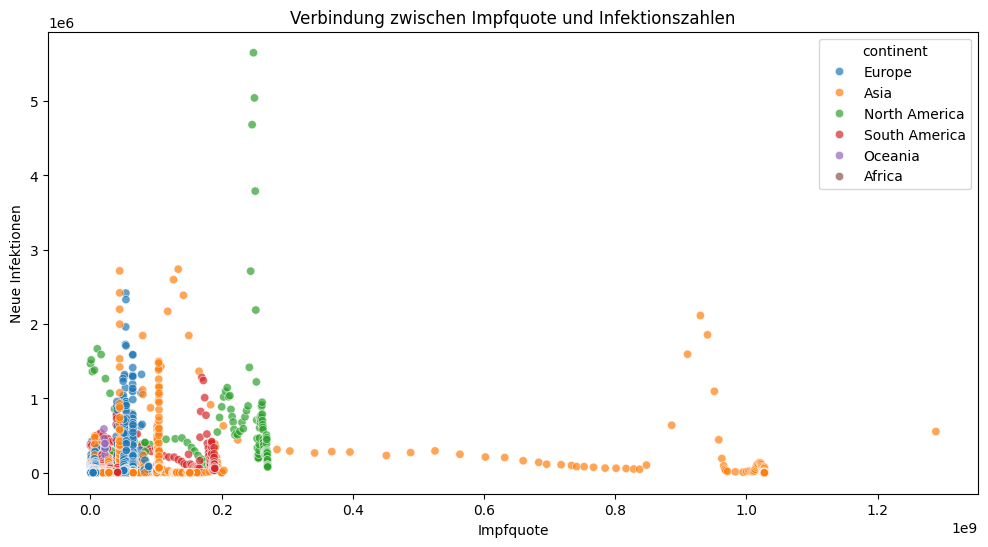

In [90]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='people_vaccinated', y='new_cases', data=data, hue='continent', alpha=0.7)
plt.title('Verbindung zwischen Impfquote und Infektionszahlen')
plt.xlabel('Impfquote')
plt.ylabel('Neue Infektionen')

correlation_vaccine = data[['people_vaccinated', 'new_cases']].corr().iloc[0, 1]
print(f"Korrelation zwischen Impfquote und neuen Infektionen: {correlation_vaccine:.2f}")

plt.show()


Ein negativer Zusammenhang zwischen Impfquote und Infektionszahlen könnte darauf hindeuten, dass Impfungen helfen, die Infektionszahlen zu senken.

Vorhersage von COVID-19-Fällen und Todesfällen in den nächsten 10 Jahren

 ARIMA-Modells 

/var/folders/0h/ypbwc3rx17j8g6cw7k7fj6700000gn/T/ipykernel_21019/3064479699.py:7: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  data_resampled = data.resample('Y').sum()
/Users/tatianakister/Aufgaben/myenv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


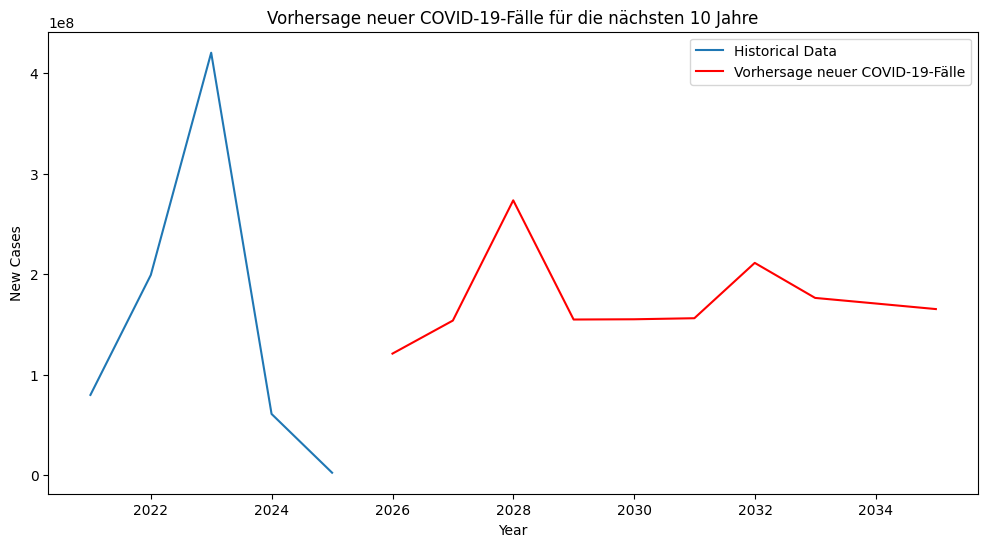

Prognostizierte neue Fälle für 2025: 120926818.5789175
Prognostizierte neue Fälle für 2026: 153806941.18703398
Prognostizierte neue Fälle für 2027: 273479683.0756948
Prognostizierte neue Fälle für 2028: 154847106.98688227
Prognostizierte neue Fälle für 2029: 155092100.78906485
Prognostizierte neue Fälle für 2030: 156139452.12694353
Prognostizierte neue Fälle für 2031: 211219026.6707964
Prognostizierte neue Fälle für 2032: 176346270.29954076
Prognostizierte neue Fälle für 2033: 170823048.4901577
Prognostizierte neue Fälle für 2034: 165241152.05812523


In [91]:
from statsmodels.tsa.arima.model import ARIMA
from datetime import timedelta

data.set_index('date', inplace=True)

# Resample data by year  and sum the new cases
data_resampled = data.resample('Y').sum() 

# Split into training and testing
train = data_resampled[:'2023']
test = data_resampled['2024':]

# Fit ARIMA
model = ARIMA(train['new_cases'], order=(5, 1, 0)) 
model_fit = model.fit()

# Machen Sie eine Prognose für die nächsten 10 Jahre
forecast = model_fit.forecast(steps=10)  # 10 years forecast

# Erstellen Sie zukünftige Daten für die Vorhersagen
future_dates = [data_resampled.index[-1] + timedelta(days=365 * i) for i in range(1, 11)]

plt.figure(figsize=(12, 6))
plt.plot(data_resampled.index, data_resampled['new_cases'], label='Historical Data')
plt.plot(future_dates, forecast, label='Vorhersage neuer COVID-19-Fälle', color='red')
plt.title('Vorhersage neuer COVID-19-Fälle für die nächsten 10 Jahre')
plt.xlabel('Year')
plt.ylabel('New Cases')
plt.legend()
plt.show()

for year, cases in zip(future_dates, forecast):
    print(f'Prognostizierte neue Fälle für {year.year}: {cases}')


Vorhersagen ist von einem statistischen Modell generiert, das auf historischen Trends im Daten basiert. 

Bei der Interpretation dieser Ergebnisse müssen jedoch mehrere Aspekte berücksichtigt werden

ARIMA Modell:
Der Prognose zeigt die Zahl der neuen Fälle bis 2034 schwanken. Im Jahr 2025 wird ein Anstieg auf etwa 120,9 Millionen neue Fälle erwartet. Der höchste Wert wird für 2027 prognostiziert, mit etwa 273,5 Millionen neuen Fällen. Danach fällt die Zahl der neuen Fälle wieder, mit einer weiteren Zunahme in den Jahren 2029 und 2030.


/var/folders/0h/ypbwc3rx17j8g6cw7k7fj6700000gn/T/ipykernel_21019/282730989.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly_deaths = data['new_deaths'].resample('Y').sum()
/Users/tatianakister/Aufgaben/myenv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/var/folders/0h/ypbwc3rx17j8g6cw7k7fj6700000gn/T/ipykernel_21019/282730989.py:11: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  forecast_index = pd.date_range(start=yearly_deaths.index[-1], periods=11, freq='Y')[1:]


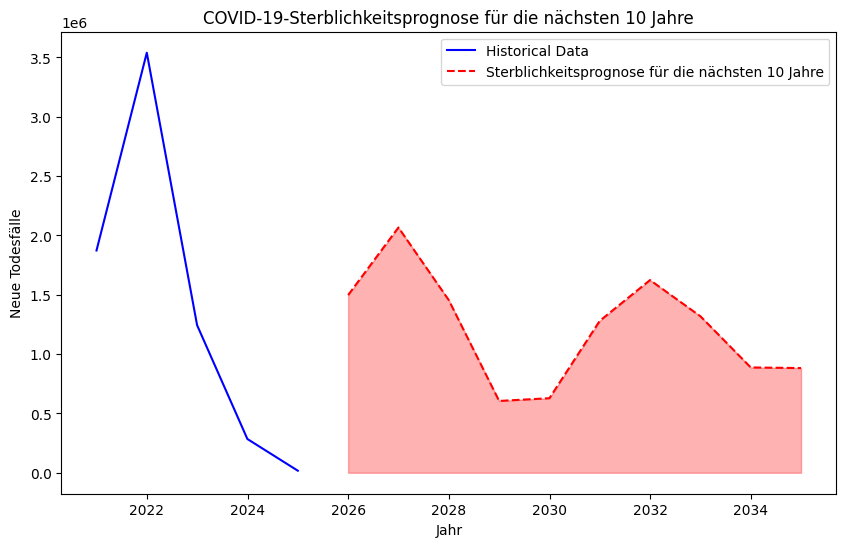

Vorhergesagte Todesfälle für 2025: 1496786.03
Vorhergesagte Todesfälle für 2026: 2066702.44
Vorhergesagte Todesfälle für 2027: 1455606.00
Vorhergesagte Todesfälle für 2028: 604979.14
Vorhergesagte Todesfälle für 2029: 628060.61
Vorhergesagte Todesfälle für 2030: 1279623.05
Vorhergesagte Todesfälle für 2031: 1623667.26
Vorhergesagte Todesfälle für 2032: 1318117.75
Vorhergesagte Todesfälle für 2033: 887224.34
Vorhergesagte Todesfälle für 2034: 881945.64


In [92]:
# Die Daten nach Jahr neu abtasten
yearly_deaths = data['new_deaths'].resample('Y').sum()

# Fit ARIMA model 
model = ARIMA(yearly_deaths, order=(5, 1, 0))  
model_fit = model.fit()

forecast = model_fit.forecast(steps=10)

#  einen Zeitindex für den prognostizierten Zeitraum (Jahresdaten)
forecast_index = pd.date_range(start=yearly_deaths.index[-1], periods=11, freq='Y')[1:]

plt.figure(figsize=(10, 6))
plt.plot(yearly_deaths.index, yearly_deaths, label='Historical Data', color='blue')
plt.plot(forecast_index, forecast, label='Sterblichkeitsprognose für die nächsten 10 Jahre', color='red', linestyle='--')
plt.fill_between(forecast_index, forecast, color='red', alpha=0.3)
plt.title('COVID-19-Sterblichkeitsprognose für die nächsten 10 Jahre')
plt.xlabel('Jahr')
plt.ylabel('Neue Todesfälle')
plt.legend()
plt.show()

for year, deaths in zip(forecast_index.year, forecast):
    print(f"Vorhergesagte Todesfälle für {year}: {deaths:.2f}")


Die Prognose zeigt schwankende Todesfallzahlen von 2025 bis 2034, mit Spitzenwerten 2026 und 2027 sowie einem deutlichen Rückgang ab 2028. Diese Schwankungen könnten durch Faktoren wie Virusmutationen, Maßnahmen oder Impfstoffwirksamkeit beeinflusst sein. Der Rückgang ab 2028 deutet auf mögliche Verbesserungen hin, sollte jedoch mit Vorsicht interpretiert werden, da die langfristige Unsicherheit hoch ist. Die Prognose dient als Orientierung für präventive Maßnahmen.

Prüfe nach duplicaten

In [93]:
print(data.columns[data.columns.duplicated()])
data = data.reset_index(drop=True)
continent_data = continent_data.drop_duplicates()

Index([], dtype='object')



10. Dashboard: 


/var/folders/0h/ypbwc3rx17j8g6cw7k7fj6700000gn/T/ipykernel_21019/630342101.py:20: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='year', y='total_deaths', data=data, hue='continent', ci=None, estimator=sum, ax=axs[1, 1])
/var/folders/0h/ypbwc3rx17j8g6cw7k7fj6700000gn/T/ipykernel_21019/630342101.py:28: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='season', y='new_cases', data=data, hue='continent', estimator=sum, ci=None, ax=axs[2, 1])
/var/folders/0h/ypbwc3rx17j8g6cw7k7fj6700000gn/T/ipykernel_21019/630342101.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='continent', y='people_vaccinated', data=continent_vaccination, palette='Set2', ax=axs[3, 0])
/var/folders/0h/ypbwc3rx17j8g6cw7k7fj6700000gn/T/ipykernel_2

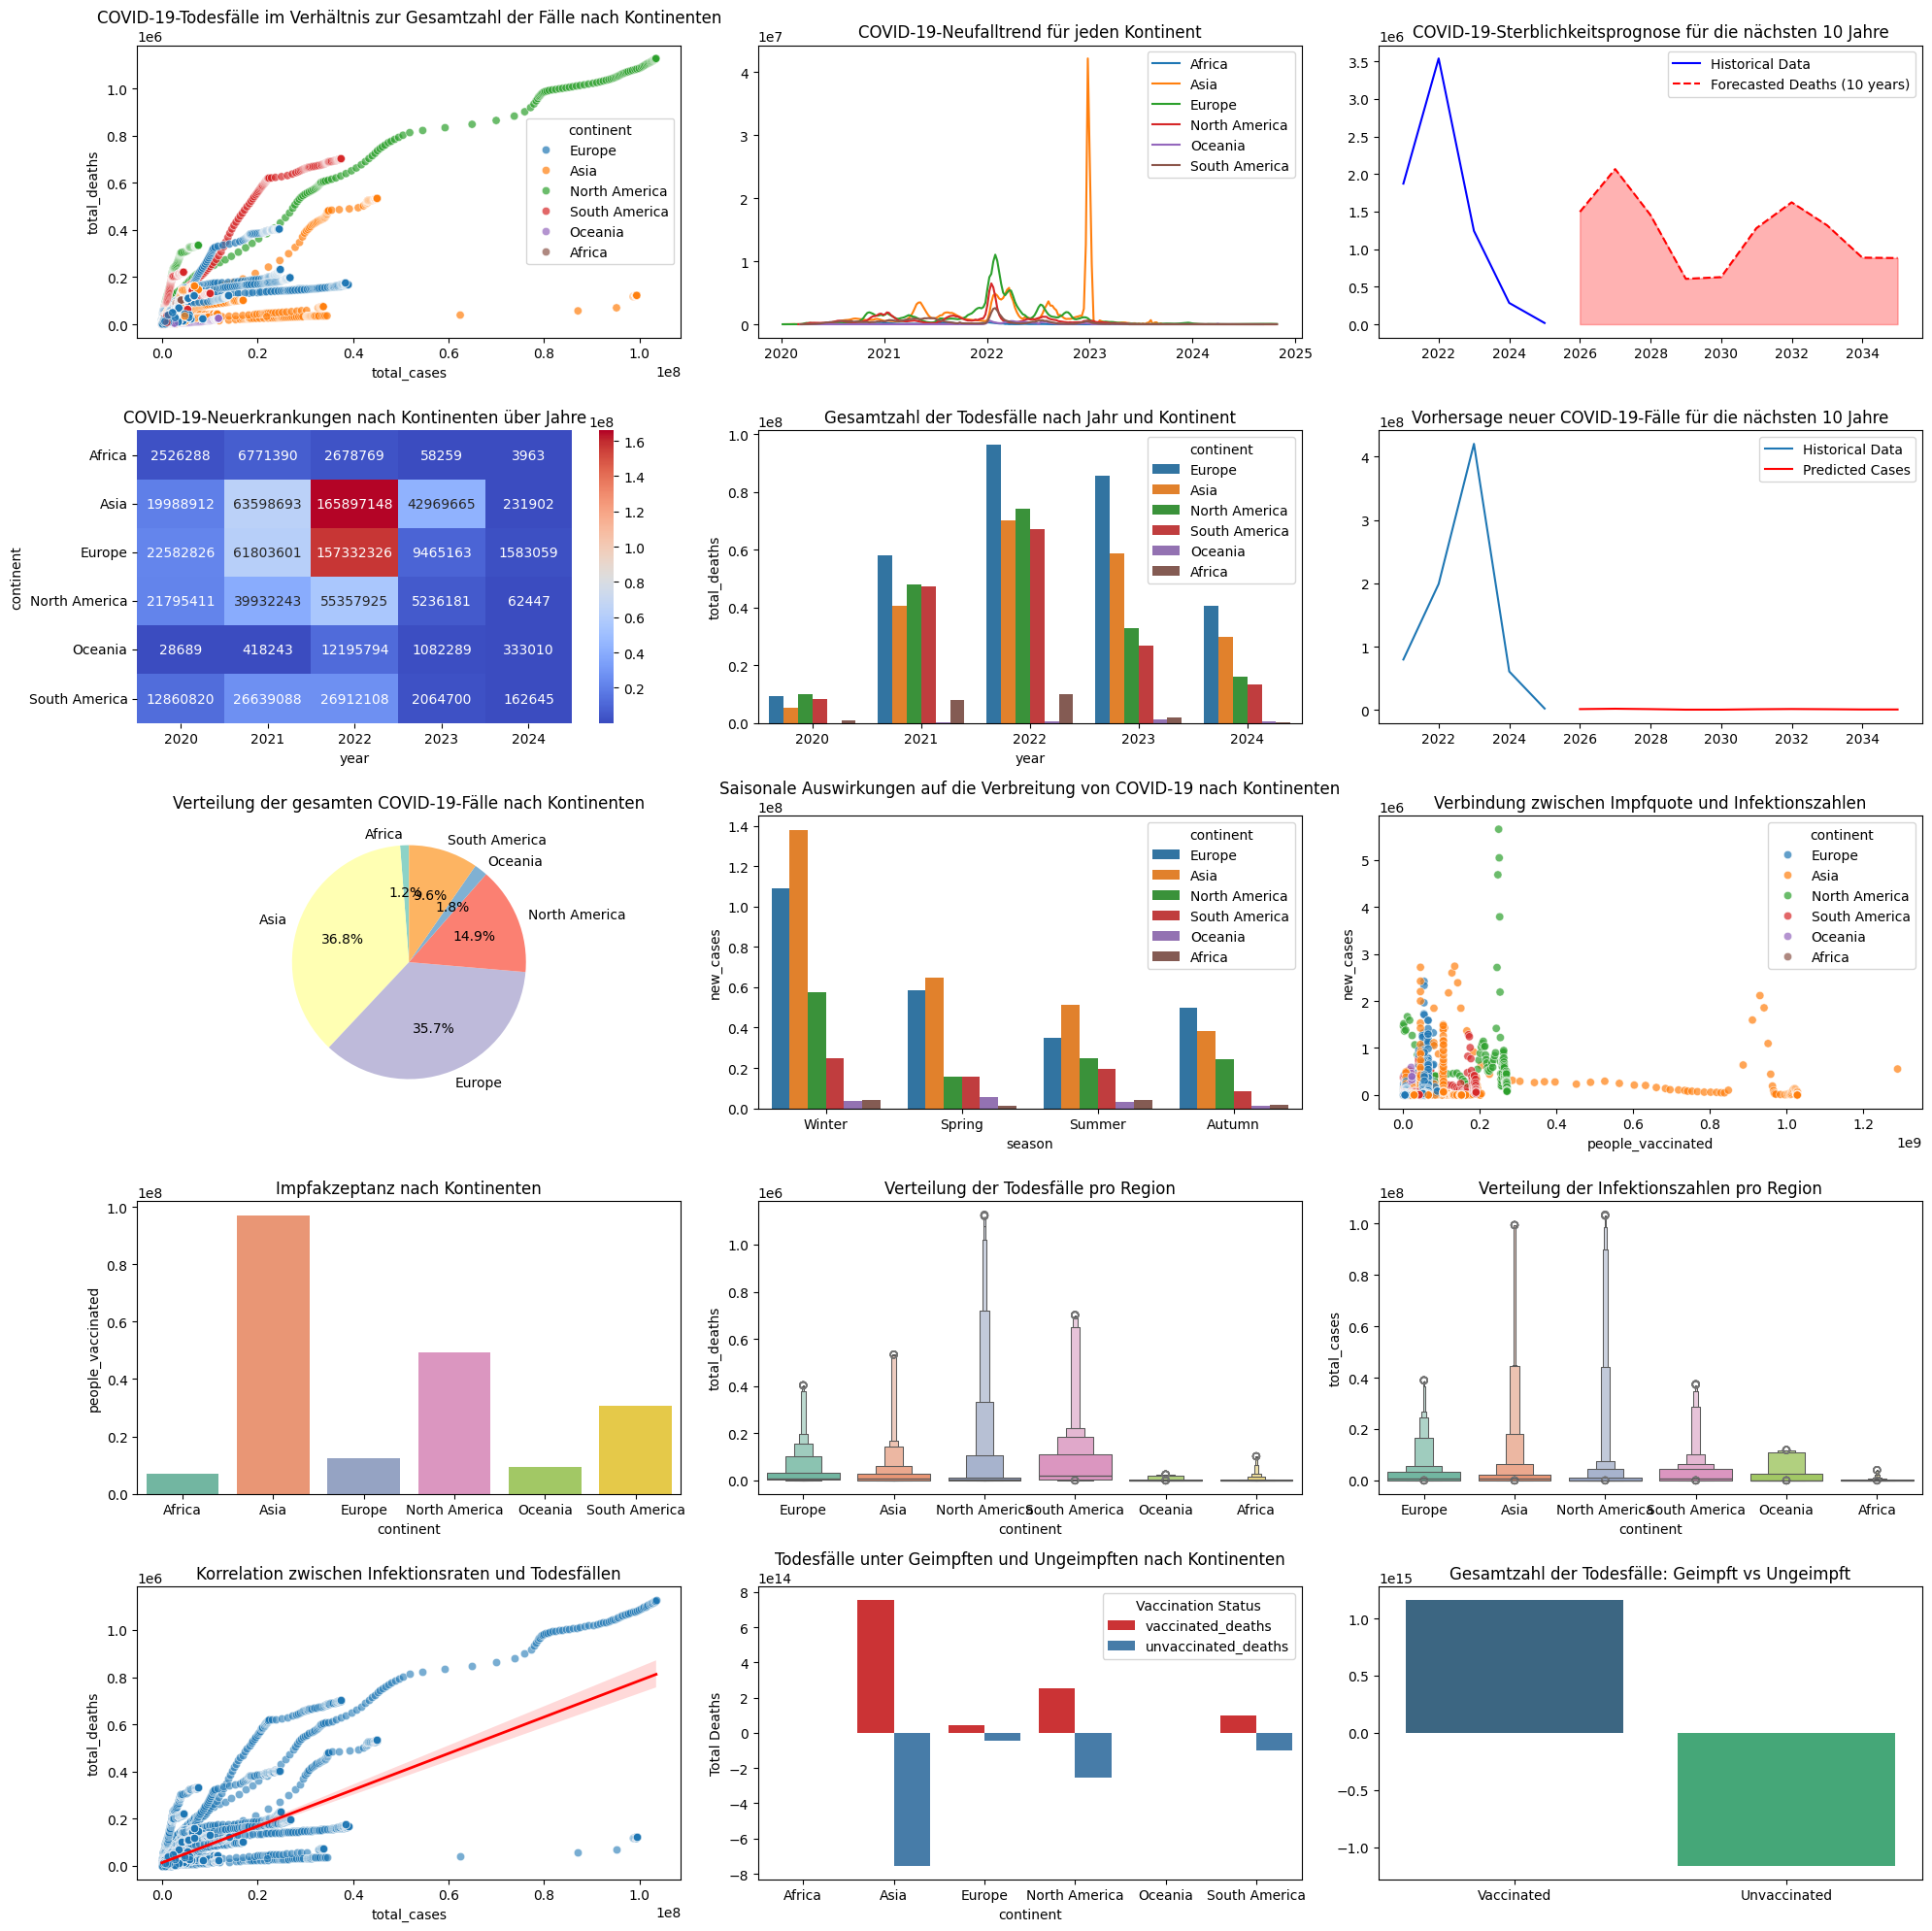

In [94]:
fig, axs = plt.subplots(5, 3, figsize=(20, 20))
print("\n10. Dashboard: ")

# Scatter plot
sns.scatterplot(x='total_cases', y='total_deaths', data=data, hue='continent', alpha=0.7, ax=axs[0, 0])
axs[0, 0].set_title('COVID-19-Todesfälle im Verhältnis zur Gesamtzahl der Fälle nach Kontinenten')

# Line plot for new cases trend
for continent in continent_data['continent'].unique():
    continent_subset = continent_data[continent_data['continent'] == continent]
    axs[0, 1].plot(continent_subset['date'], continent_subset['new_cases'], label=continent)
axs[0, 1].set_title('COVID-19-Neufalltrend für jeden Kontinent')
axs[0, 1].legend()

# Heatmap for new cases by continent over years
sns.heatmap(heatmap_data, cmap='coolwarm', cbar=True, annot=True, fmt=".0f", ax=axs[1, 0])
axs[1, 0].set_title('COVID-19-Neuerkrankungen nach Kontinenten über Jahre')

# Bar plot for total deaths by year and continent
sns.barplot(x='year', y='total_deaths', data=data, hue='continent', ci=None, estimator=sum, ax=axs[1, 1])
axs[1, 1].set_title('Gesamtzahl der Todesfälle nach Jahr und Kontinent')

# Pie chart for distribution of total cases by continent
axs[2, 0].pie(continent_cases, labels=continent_cases.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set3", len(continent_cases)))
axs[2, 0].set_title('Verteilung der gesamten COVID-19-Fälle nach Kontinenten')

# Bar plot for new cases by season and continent
sns.barplot(x='season', y='new_cases', data=data, hue='continent', estimator=sum, ci=None, ax=axs[2, 1])
axs[2, 1].set_title('Saisonale Auswirkungen auf die Verbreitung von COVID-19 nach Kontinenten')

# Scatter plot for people vaccinated vs new cases
sns.scatterplot(x='people_vaccinated', y='new_cases', data=data.reset_index(drop=True), hue='continent', alpha=0.7, ax=axs[2, 2])
axs[2, 2].set_title('Verbindung zwischen Impfquote und Infektionszahlen')

# Time series plot for future predictions
axs[1, 2].plot(data_resampled.index, data_resampled['new_cases'], label='Historical Data')
axs[1, 2].plot(future_dates, forecast, label='Predicted Cases', color='red')
axs[1, 2].set_title('Vorhersage neuer COVID-19-Fälle für die nächsten 10 Jahre')
axs[1, 2].legend()

# Time series plot for deaths forecast
axs[0, 2].plot(yearly_deaths.index, yearly_deaths, label='Historical Data', color='blue')
axs[0, 2].plot(forecast_index, forecast, label='Forecasted Deaths (10 years)', color='red', linestyle='--')
axs[0, 2].fill_between(forecast_index, forecast, color='red', alpha=0.3)
axs[0, 2].set_title('COVID-19-Sterblichkeitsprognose für die nächsten 10 Jahre')
axs[0, 2].legend()

# Bar plot for vaccination rates vs mortality rates
sns.barplot(x='continent', y='people_vaccinated', data=continent_vaccination, palette='Set2', ax=axs[3, 0])
axs[3, 0].set_title('Impfakzeptanz nach Kontinenten')

# Boxen plot for total deaths by continent
sns.boxenplot(x='continent', y='total_deaths', data=data, palette='Set2', ax=axs[3, 1])
axs[3, 1].set_title('Verteilung der Todesfälle pro Region')

# Boxen plot for total cases by continent
sns.boxenplot(x='continent', y='total_cases', data=data, palette='Set2', ax=axs[3, 2])
axs[3, 2].set_title('Verteilung der Infektionszahlen pro Region')

# Scatter plot and regression plot for total cases vs total deaths
sns.scatterplot(x='total_cases', y='total_deaths', data=data, alpha=0.6, ax=axs[4, 0])
sns.regplot(x='total_cases', y='total_deaths', data=data, scatter=False, color='red', line_kws={'linewidth': 2}, ax=axs[4, 0])
axs[4, 0].set_title('Korrelation zwischen Infektionsraten und Todesfällen')

# Bar plot for deaths among vaccinated vs unvaccinated by continent
sns.barplot(x='continent', y='Total Deaths', hue='Vaccination Status', data=continent_deaths_melted, palette='Set1', ax=axs[4, 1])
axs[4, 1].set_title('Todesfälle unter Geimpften und Ungeimpften nach Kontinenten')

# Bar plot for total deaths: vaccinated vs unvaccinated
sns.barplot(x=deaths_data, y=deaths_values, palette='viridis', ax=axs[4, 2])
axs[4, 2].set_title('Gesamtzahl der Todesfälle: Geimpft vs Ungeimpft')

# Entfernen von nicht benötigten Subplots
for i in range(5):
    for j in range(3):
        if axs[i, j] is None:
            axs[i, j].axis('off')

plt.tight_layout()
plt.savefig('static/covid_dashboard.png')
plt.show()
